# <span style="color: red;"> 1. Tính toán trên mảng: Broadcasting</span>

Broadcasting là một tính năng quan trọng trong numpy cho phép thực hiện các phép toán trên các mảng có kích thước khác nhau một cách tự động và linh hoạt 
Nó cho phép np mở rộng kích thước của một hay nhiều mảng để phù hợp với kích thước của các mảng khác trong phép toán


## Quy tắc mở rộng kích thước và thực hiện phép toán 
1. Quy tắc 1: Nếu hai mảng có số chiều khác nhau, mảng có số chiều thấp hơn sẽ được mở rộng bằng cách thêm các chiều có kích thước 1 vào đầu mảng
2. Quy tắc 2: Nếu kích thước của một chiều trong mảng là 1 và mảng khác có kích thước của chiều tương ứng khác 1, để mở rộng mảng có kích thước 1 sao chép giá trị để phù hợp với kích thước của mảng khác
3. Quy tắc 3: Nếu trong các chiều khác nhau của hai mảng, không có chiều nào có kích thước là 1, Numpy sẽ gây lỗi và không thể thực hiện Broadcasting

In [1]:
import numpy as np


### Broadcasting example 1

In [2]:
# Khởi tạo một mảng hai chiều numpy có shape (2,3)
M = np.ones((2,3))

# Khởi tạo mảng một chiều numpy shape (3,)
a = np.arange(3)


In [3]:
M.shape


(2, 3)

In [4]:
a.shape

(3,)

In [5]:
# Nhìn vào quy tắc 1: mảng M và a có số chiều khác nhau. 
# Mảng a có số chiều thấp hơn được đệm bằng cách thêm số chiều 1 vào bên trái shape
# Khi đó ta có: a.shape = (1,3), M.shape = (2,3)
# Nhìn vào quy tắc 2: kích thước chiều của a và M khác nhau (1#2) 
# Mở rộng kích thước chiều a.shape = (2,3)
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

In [6]:
# Khởi tạo mảng một chiều a có shape(3,) sau đó reshape mảng (3,1)
a = np.arange(3).reshape((3,1))
# Khởi tạo mảng một chiều b (3,)
b = np.arange(3)

In [7]:
# Nhìn vào quy tắc 1 : a và b có số chiều khác nhau, b có số chiều nhỏ hơn nên đệm thêm 1 vào bên trái shape
# a.shape = (3,1), b.shape = (1,3)
# Nhìn vào quy tắc 2: Mảng a và b có kích thước khác nhau ở các chiều tưng ứng
# Mở rộng kích thước chiều a.shape = (3,3), M.shape = (3,2)
# Nhìn vào quy tắc 3:
# (a+b).shape = (3,3)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

###  Broadcasting example 3


In [8]:
#  Khởi tạo mảng M hai chiều (3,2)
M = np.ones((3,2))
#  Khởi tạo mảng a 1 chiều (3,)
a = np.arange(3)
# So sánh với ví dụ 1 ta thấy mảng M được chuyển vị 

In [9]:
# Nhìn vào quy tắc 1: M và a có số chiều khác nhau => pad thêm chiều 1 vào đầu shape 
# M.shape = (3,2), a.shape = (1,3)
# Nhìn vào quy tắc 2: M và a có kích thước khác nhau ở các chiều tương ứng 
# Mở rộng kích thước a.shape = (3,3)
# Kích thước M.shape = (3,2)
# Nhìn vào quy tắc 3: ta thấu M và a có shape khác nhau do đó 2 mảng này tương thích 
# (M + a): Raise Error


Note: Thường sẽ có một lỗi thường mắc phải ở đây là bạn có thể tưởng tượng làm cho a và M tương thích bằng cách pad vào bên phải thay vì bên trái, tuy nhiên đây không phải mà cách broadcast hoạt động. Sự sắp xếp linh động có thể hữu ích trong một vài TH nhưng nó sẽ dẫn đến những tiềm ẩn về sự mơ hồ. Nếu bạn muốn pad vào bên phải có thể reshape array 

In [10]:
# reshape array a
a[:, np.newaxis].shape

(3, 1)

In [11]:
M + a[:, np.newaxis].shape

array([[4., 2.],
       [4., 2.],
       [4., 2.]])

## Broadcasting in Practice


### Centering an array 
("Tâm hóa" một mảng có nghĩa là điều chỉnh các giá trị của mảng sao cho giá trị trung bình của mảng trở thành 0. Thực hiện bằng cách trừ đi giá trị trung bình của mảng từ mỗi phần tử trong mảng)

In [12]:
# Tưởng tượng bạn có 1 mảng có 10 đối tượng mỗi đối tượng bao gồm 3 giá trị
# Lưu trữ vào 1 mảng (10,3)
X = np.random.random((10,3))

In [13]:
# Tính giá trị trung bình của mỗi feature sử dụng mean trên thứ nguyên đầu tiên
Xmean = X.mean(0)
Xmean

array([0.73456129, 0.4709126 , 0.55721615])

In [14]:
# Giờ có thể tâm hóa mảng X theo thứ nguyên đầu tiên bằng cách lấy X - Xmean
# Đây chính là phép tính Broadcasting (10,3) và (3,)
X_centered = X - Xmean
X_centered

array([[ 0.1413932 , -0.27844133,  0.29774457],
       [ 0.16899986,  0.10223448, -0.4530065 ],
       [ 0.04995724,  0.07704882,  0.36601956],
       [-0.62396055,  0.28985183, -0.06234341],
       [ 0.21515888,  0.46928227,  0.03725359],
       [ 0.12246378,  0.11683746,  0.20726963],
       [-0.00771681, -0.33904056,  0.03128203],
       [-0.09749032,  0.08979974, -0.22911549],
       [-0.05759965, -0.15924235,  0.02163397],
       [ 0.08879437, -0.36833035, -0.21673795]])

In [15]:
# Kiểm tra xem mảng X_certered đã có giá trị trung bình = 0 hay chưa
X_centered.mean(0)
# Trong phạm vi độ chính xác của máy giá trị trung bình giờ đã bằng 0

array([-5.55111512e-17,  9.99200722e-17,  0.00000000e+00])

Note: Có thể tâm hóa theo toàn bộ mảng thì giá trị trung bình của mảng bằng 0, tâm hóa theo hàng thì mỗi hàng sẽ có giá trị trung bình bằng 0, tâm hóa theo cột thì mỗi cột sẽ có giá trị trung bình bằng 0

## Plotting a two-dimentional function
Vẽ đồ thị hàm hai chiều: Broadcasting có thể hiển thị hình ảnh dựa trên các chức năng hai chiều 
Nếu chúng ta muốn định nghĩa một hàm z= f(x,y), broadcast có thể được sử dụng để tính hàm trên lưới

In [16]:
# x và y là hai mảng có giá trị từ 0 đến 5 có 50 bước nhảy
x = np.linspace(0,5,50)    #(50,)
y = np.linspace(0,5,50)[:, np.newaxis] #(50,1)
z = np.sin(x)**10 + np.cos(10 + y*x)*np.cos(x)


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

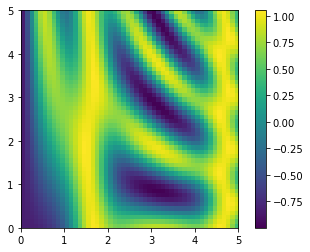

In [18]:
plt.imshow(z, origin = 'lower' , extent = [0, 5, 0, 5], cmap = 'viridis')
plt.colorbar();

# <span style="color: red;">2. Comparisons, Masks, and Boolean Logic</span>
Masking được sử dụng khi bạn muốn extract, thay đổi, đếm hoặc các thao tác với giá trị trong mảng dựa.
Ví dụ: đếm tất các giá trị lớn hơn 1 giá trị nhất định, xóa tất cả cái gí trị outlier trên threshold

## Comparison Operators as ufunc
Numpy có thể thực hiện các toán tử so sánh như < và >. Kết quả trả về là mảng chứa các giá trị Boolean.

In [19]:
x = np.arange(5) 
x < 3

array([ True,  True,  True, False, False])

In [20]:
x > 3

array([False, False, False, False,  True])

In [21]:
x <= 3 

array([ True,  True,  True,  True, False])

In [22]:
x >= 3

array([False, False, False,  True,  True])

In [23]:
x != 3

array([ True,  True,  True, False,  True])

In [24]:
x == 3

array([False, False, False,  True, False])

In [25]:
(2 * x) == (x**2)

array([ True, False,  True, False, False])

## Làm việc với mảng boolean 

In [26]:

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting entries
Để đếm số giá trị True trong một mảng Boolean sử dụng np.count_nonzero 

In [27]:
# Có bao nhiêu giá trị nhỏ hơn 6
np.count_nonzero(x <6)

8

In [28]:
# Có bao nhiêu giá trị nhỏ hơn 6 trên mỗi dòng
np.count_nonzero(x < 6, axis = 1)

array([4, 2, 2], dtype=int64)

In [29]:
# Có giá nào trong mảng lớn hơn 8 không 
np.any(x>8)

True

In [30]:
# Có giá trị nào bé hơn 0 không?
np.any(x<0)

False

In [31]:
# có phải tất cả các giá trị đều lớn 10 
np.all(x>10)

False

In [32]:
# có phải tất cả các giá trị đều = 6 
np.all(x == 6)


False

np.all và np.any cũng có thể sử dụng dọc theo các axis

### Boolean Operator

In [33]:
np.sum((x > 3) & (x < 10))


7

## Boolean Arrays as Masks

In [34]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [35]:
x<5 

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [36]:
x[x<5]
# Trả về một mảng 1 chiều với các giá trị thỏa màn điều kiện, các giá trịtại vị trí mà trong mask array True

array([0, 3, 3, 3, 2, 4])

# <span style="color: red;">3. Fancy Indexing</span>


## Exploring Fancy Indexing
Fancy Indexing  cho phép bạn truy cập các phần tử của một mảng bằng cách sử dụng mảng các chỉ số
Điều này rất hữu ích khi bạn cần truy cập hoặc thay đổi nhiều phần tử không liên tiếp trong mảng

In [37]:
# Khởi tạo randomstate với seed là 42 để tạo ra kết quả ngẫu nhiên có thể lặp lại
# Khi bạn khởi tạo RandomState với một seed cụ thể bạn có thể đảm bảo rằng các số ngẫu nhiên sinh ra là giống nhau mỗi lần bạn chạy mã
rand = np.random.RandomState(42)
# Tảo mảng 1D gồm 10 số nguyên ngẫu nhiên từ 0 đến 99
x = rand.randint(100, size =10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [38]:
# Truy cập vào 3 phần tử khác nhau trong mảng
[x[3], x[7], x[2]]

[71, 86, 14]

In [39]:
# Ngoài ra có thể sử dụng một mảng chỉ mục để có kết quả tương tự
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [40]:
# Khi sử dụng fancy indexing, shape của kết quả sẽ phụ thuộc vào hình dạng của các chỉ số được sử dụng để truy cập mảng, chứ không phải là hình dạng của mảng gốc.
ind = np.array([[3, 7],
              [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [41]:
# Fancy indexing có thể làm việc trên nhiều chiều 
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [43]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Note: fancy indexing luôn trả về giá trị phản ánh hình dạng dc broadcast của các chỉ số thay vì hình dạng của mảng đang được truy cập

## Combined indexing

In [44]:
# Kết hợp các chỉ số đơn giản
X[2, [2,0,1]]

array([10,  8,  9])

In [45]:
# Kết hợp với slicing
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [46]:
# Kết hợp với masking
mask = np.array([1,0,1,0], dtype = bool)
# mask chọn các cột 0 và 2 vì True ở các vị trí đó.
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Indexing được kết hợp linh hoạt để truy câppj và thay đổi các giá trị trong mảng

## Ví dụ: Chọn các điểm ngẫu nhiên 
Chọn các tập con của các hàng từ một ma trận. Ví dụ ta có N điểm trong D chiều 

In [47]:
# Định nghĩa giá trị trung bình (mean vector)
mean = [0,0]
# Định nghĩa ma trận hiệp phương sai (covarience matrix)
cov = [[1,2],
       [2,5]]
# Khởi tạo X từ phân phối chuẩn đa biến với số lượng mẫu là 100
X = rand.multivariate_normal(mean,cov, 100)
# Với các tham số đã sử dụng (mean vector có 2 phần tử và số lượng mẫu là 100), 
# Mảng X sẽ có hình dạng (100, 2), nghĩa là nó chứa 100 mẫu, mỗi mẫu có 2 giá trị (tương ứng với 2 biến trong phân phối chuẩn đa biến).
X.shape

(100, 2)

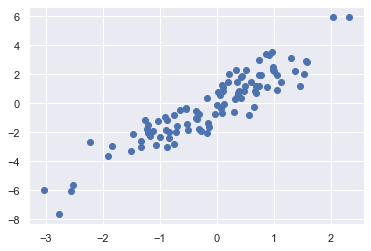

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.set() # for plot styling
plt.scatter(X[:,0], X[:, 1])

In [49]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([30, 49, 70,  6, 87, 20, 71, 38, 75, 92, 12, 62, 31, 59, 58, 63, 97,
       13, 96, 15])

In [50]:
selection = X[indices]
selection.shape


(20, 2)

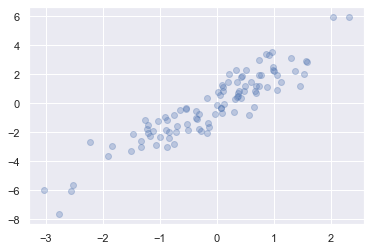

In [51]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Kịch bản này thường được sử dụng để phân vùng nhanh các tập dữ liệu, thường cần thiết trong quá trình phân tách train/test để xác thực các mô hình thống kê và trong các phương pháp lấy mẫu để trả lời các câu hỏi thống kê

## Thay đổi các giá trị với fancy indexing
Fancy indexing có thể truy câppj từng phần của 1 mảng và cũng có thể thay đổi chúng. Ví dụ, chúng ta có một mảng chứa các chỉ mục và chúng ta muốn đặt các mục tương ứng trong mảng thành giá trị nào đó:

In [52]:
x = np.arange(10)
i = np.array([2, 1,8,4])
x[i] = 99 
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [53]:
x[i] -= 10

In [54]:
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [55]:
# lưu ý việc các chỉ mục được lặp lại kết hợp với các thao tác này có thể gây ra một số kết quả không mong muốn
x = np.zeros(10)
x[[0,0]] = [4, 6 ]
x
# Lúc này giá trị 4 đã ở đâu? Kết quả cả thao tác này đầu tiên gán x[0] = 4 sau đó x[0] = 6
# Vì vậy lúc này x[0] bắt buộc có giá trị là 6

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
# Xét một trường hợp khác: 
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Ta sẽ mong kết quả x[3] = 2, x[4] = 3 là các lần mỗi index lặp lại. Nhưng trong TH này kết quả không như thế? Quá trình diễn ra như sau:
 - Numpy xác định các giá trị hiện tại tại các chỉ số i trong mảng x
 - Phép cộng 1 được áp dụng cho các giá trị này
 - Kết quả của phép cộng được gán trở lại cho các vị trí tương ứng trong x
Điều này dẫn đến việc các giá trị tại các chỉ số dược ghi đè mà không tích lũy lại nếu các chỉ số lặp lại. Vì vậy không phải quá trình tăng giá trị được thực hiện nhiều lần mà là quá trình gán giá trị khiến cho các chỉ số lặp lại không được cộng dồn như mong đợi

In [60]:
x = np.zeros(10)

# Các chỉ số cần tăng
i = [2, 3, 3, 4, 4, 4]

# Sử dụng np.add.at để tăng giá trị tại các chỉ số
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

np.add.at thực hiện phép cộng tại chỗ (in-place) trên các chỉ số được chỉ định. Đây là cách chúng ta có thể sử dụng nó để giải quyết vấn đề cộng dồn các giá trị tại các chỉ số lặp lại.

## Ví dụ : Binning Data
Binning data là một kỹ thuật trong xử lý dữ liệu và phân tích thống kê nhằm chia một tập dữ liệu liên tục thành các khoảng (bins) nhỏ hơn.
Kỹ thuật này thường được sử dụng để làm mịn dữ liệu, giảm nhiễu và giúp dễ dành hơn trong việc phân tích và trực quan hóa dũ liệu
Ví dụ: Tưởng tượng chúng ta có 1000 giá trị và muốn nhanh chóng tìm ra chúng nằm ở đâu trong 1 mảng các bins 
Sử dụng ufunc.at 

In [62]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
# Khởi tạo mảng đếm counts có cùng kích thước và kiểu dữ liệu với mảng bins nhưng tất cả các phần tử đều = 0 
# Mảng này sẽ được sử dụng để đếm số lượng phần tử dữ liệu rơi vào mỗi bin
counts = np.zeros_like(bins)
#Tìm các chỉ số của bins mà các giá trị trong mảng x sẽ rơi vào => phân loại dữ liệu vào bins
#np.searchsorted sẽ trả về một mảng các chỉ số cho biết vị trí mà các giá trị của x sẽ được chèn vào để duy trì thứ tự của bins
i = np.searchsorted(bins, x)
# Cộng 1 vào mỗi bin
np.add.at(counts, i, 1)


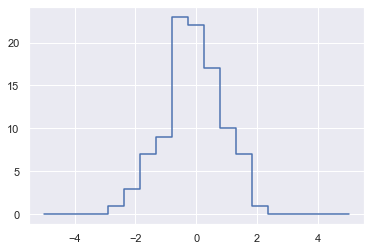

In [69]:
# plot the results
plt.plot(bins, counts, drawstyle='steps');

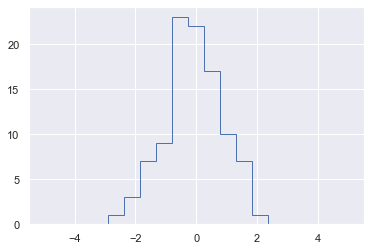

In [70]:
# Matplotlib provides the plt.hist() routine, which does the same in a single line:
plt.hist(x, bins, histtype='step');

In [71]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
69.8 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
31.1 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Thuật toán custom nhanh hơn nhiều lần so với thuật toán được tối ưu hóa trong NumPy! Làm sao có thể? Nếu bạn tìm hiểu sâu về np.histogram mã nguồn (bạn có thể thực hiện việc này trong IPython bằng cách nhập np.histogram??), bạn sẽ thấy rằng nó phức tạp hơn một chút so với thao tác tìm kiếm và đếm đơn giản mà chúng tôi đã thực hiện; điều này là do thuật toán của NumPy linh hoạt hơn và đặc biệt được thiết kế để có hiệu suất tốt hơn khi số lượng điểm dữ liệu trở nên lớn:

In [72]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
143 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
265 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Điều so sánh này cho thấy hiệu quả thuật toán hầu như không bao giờ là một câu hỏi đơn giản. Thuật toán hiệu quả cho các tập dữ liệu lớn không phải lúc nào cũng là lựa chọn tốt nhất cho các tập dữ liệu nhỏ và ngược lại 

# <span style="color: red;">4. Sorting Arrays</span>


Ví dụ, một selection sort đơn giản được lặp lại tìm giá trị nhỏ nhất của 1 list và đổi chỗ cho đến khi list được sắp xếp

In [73]:
def selection_sort(x):
    for i in range(len(x)):
        # Tìm chỉ số của phần tử nhỏ nhất trong phần còn lại của mảng
        swap = i + np.argmin(x[i:])
        # Hoán đổi phần tử thứ i với phần tử nhỏ nhất tìm được
        (x[i], x[swap]) = (x[swap], x[i])
    return x

Selection sort đơn giản dễ dùng tuy nhiên khi mảng quá lớn nó sẽ rất chậm. nếu có N giá trị nó sẽ yêu cầu N vòng lặp, trong mỗi vòng lặp yêu cầu N sự so sánh nên khi đó big-O = O[N^2]

In [74]:
# Tuy vậy selection sort vẫn tốt hơn bogosort
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Bogo sort sẽ liên tục áp dụng việc xáo trộn ngẫu nhiên mảng cho đến khi kết quả được sắp xếp với big-O = O[NxN!] => never used for any real computation


## Fast Sorting in Numpy
#### np.sort và np.argsort

Mặc dù Python có sẵn các hàm sort và sorted khi làm việc với list nhưng chúng ta sẽ bàn luận về np.sort ở đây
Theo mặc định np.sort sử dụng O[NlogN], thuật toán quicksort, mặc dù mergesort và heapsort cũng có sẵn. Đối với hầu hết các ứng dụng, tính năng sắp xếp nhanh mặc định là quá đủ.

In [76]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [78]:
x.sort()
x

array([1, 2, 3, 4, 5])

argsort thay vì trả về giá trị của phần tử thì trả về chỉ mục của phần tử

In [79]:
x = np.array([2, 1, 4, 3, 5])
np.argsort(x)

array([1, 0, 3, 2, 4], dtype=int64)

### Sorting along rows or columns

In [82]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [83]:
# sắp xếp theo cột của X
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [84]:
# sắp xếp theo hàng X
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

Đôi lúc ta sẽ không cần sắp xếp mảng nhưng muốn tìm giá trị k nhỏ nhất trong mảng. Ta sử dụng np.partition 
np.partition(array,k) trả về mảng có k giá trị bên trái là ba giá trị nhỏ nhất các giá trị còn lại ở bên phải theo thứ tự tùy ý


In [85]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [86]:
np.partition(X, 2, axis =1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [87]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

Giống như np.argsort, np.argpartition cũng tính toán dựa trên chỉ mục 
Ta xét ví dụ dưới đây

## Ví dụ : k-Nearest Neighbors

In [89]:
# Khởi tạo một mảng 2D (10,2)
X = rand.rand(10,2)
X

array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

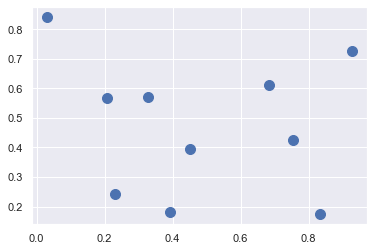

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:,0], X[:, 1], s =100)

(10, 1, 2)